Perform all the processes in [Wrangling.ipynb](https://github.com/Data-Epic/data-wrangling-chidimma-ijoma/blob/feature-task/task%201%2Fwrangling.py)


They are don in the cell below👇

In [1]:
import pandas as pd # For data frame manipulation
import numpy as np # For handling arithmetic calculations
from datetime import datetime # For handling date/time data

df = pd.read_csv("task 1/MOCK_DATA (3).csv") # Read the .csv
to_load = int(0.75*df.shape[0]) # Find the number of rows to load
df = df[:to_load] # Load only the first 75%

'''
To remove consecutive duplicates only
'''
df = df[~df.duplicated(keep="first").mask(df.index.to_series().diff() != 1, False)]

'''
To convert the Sign-up Date column to proper date/time format
'''
df["Sign-up Date"] = pd.to_datetime(df["Sign-up Date"])

'''
To replace all 2020 entries with Nan
'''
df.loc[df["Sign-up Date"].dt.year == 2020, "Sign-up Date"] = np.nan

'''
To drop all rows where the column "Total Purchases" is less than 5 but only if the customer is from Canada. format
'''
df = df.drop(df[(df["Total Purchases"] < 5) & (df["Country"] == "Canada")].index)

def calculate_loyalty_score(row): # Function to calculate loyalty score
    """
    Returns a loyalty score based on total purchases and membership duration.

    Parameters:
    row (pd.Series): Customer data with "Total Purchases" and "Sign-up Date".

    Returns:
    int: Loyalty score (1, 2, or 3).
    """
    membership_years = pd.Timestamp.now().year - row["Sign-up Date"].year

    if row["Total Purchases"] > 20:
        return 3
    elif 10 <= row["Total Purchases"] <= 20:
        return 2
    elif row["Total Purchases"] < 10:
        return 2 if membership_years > 3 else 1

df["Loyalty Score"] = df.apply(calculate_loyalty_score, axis=1) # Apply function

df_no_mx = df[df["Country"] != "Mexico"] # Filter out Mexico

aggregate_df = df_no_mx.groupby("Country").agg( # Calculate the following:
    Avg_Total_Purchases=("Total Purchases", "mean"), # Average Total Purchases
    Max_Total_Purchases=("Total Purchases", "max"), # Maximum Total Purchases
    Mode_Loyalty_Score=("Loyalty Score", lambda x: x.mode().mean())) # Most common Loyalty Scores and using the averages for multimodal countries

aggregate_df # Display the statistics

,Avg_Total_Purchases,Max_Total_Purchases,Mode_Loyalty_Score
Country,,,
Afghanistan,8.000000,20,2.0
Albania,20.500000,38,2.5
Andorra,11.000000,11,2.0
Angola,15.000000,29,2.5
Argentina,24.692308,45,3.0
...,...,...,...
Vanuatu,22.000000,22,3.0
Venezuela,25.333333,43,3.0
Vietnam,24.333333,47,3.0


Now we can perform some analyses to include in the report

In [2]:
df.describe() # Get summary statistics

,Customer ID,Total Purchases,Sign-up Date,Loyalty Score
count,748.000000,748.000000,660,748.000000
mean,1017.639037,23.891711,2019-08-07 02:06:24.104545536,2.490642
min,1000.000000,1.000000,2015-03-18 06:34:41,1.000000
25%,1009.000000,12.000000,2017-03-01 18:42:28,2.000000
50%,1018.000000,24.000000,2019-03-08 04:58:49,3.000000
75%,1026.000000,36.000000,2022-03-19 01:43:46,3.000000
max,1035.000000,48.000000,2024-02-29 22:35:54,3.000000
std,10.453988,13.899728,NaN,0.626217


Import packages to help with visualisation

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Total Purchases'}>],
       [<Axes: title={'center': 'Sign-up Date'}>,
        <Axes: title={'center': 'Loyalty Score'}>]], dtype=object)

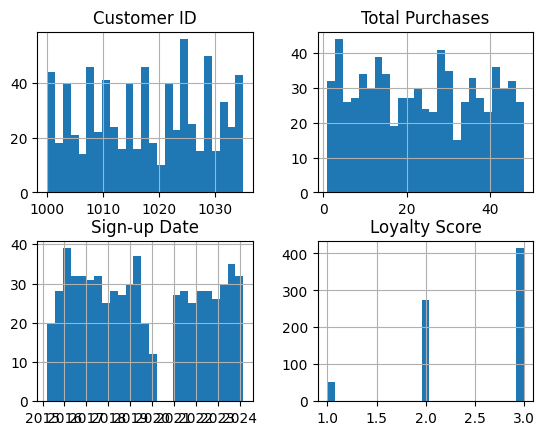

In [4]:
df_no_mx.hist(bins = 25)

In [5]:
aggregate_df["Avg_Total_Purchases"].sort_values()

,Avg_Total_Purchases
Country,
Sierra Leone,2.0
Bolivia,3.0
Jamaica,3.0
Bermuda,3.0
Uganda,3.5
...,...
South Korea,41.0
Israel,44.0
Tunisia,44.0


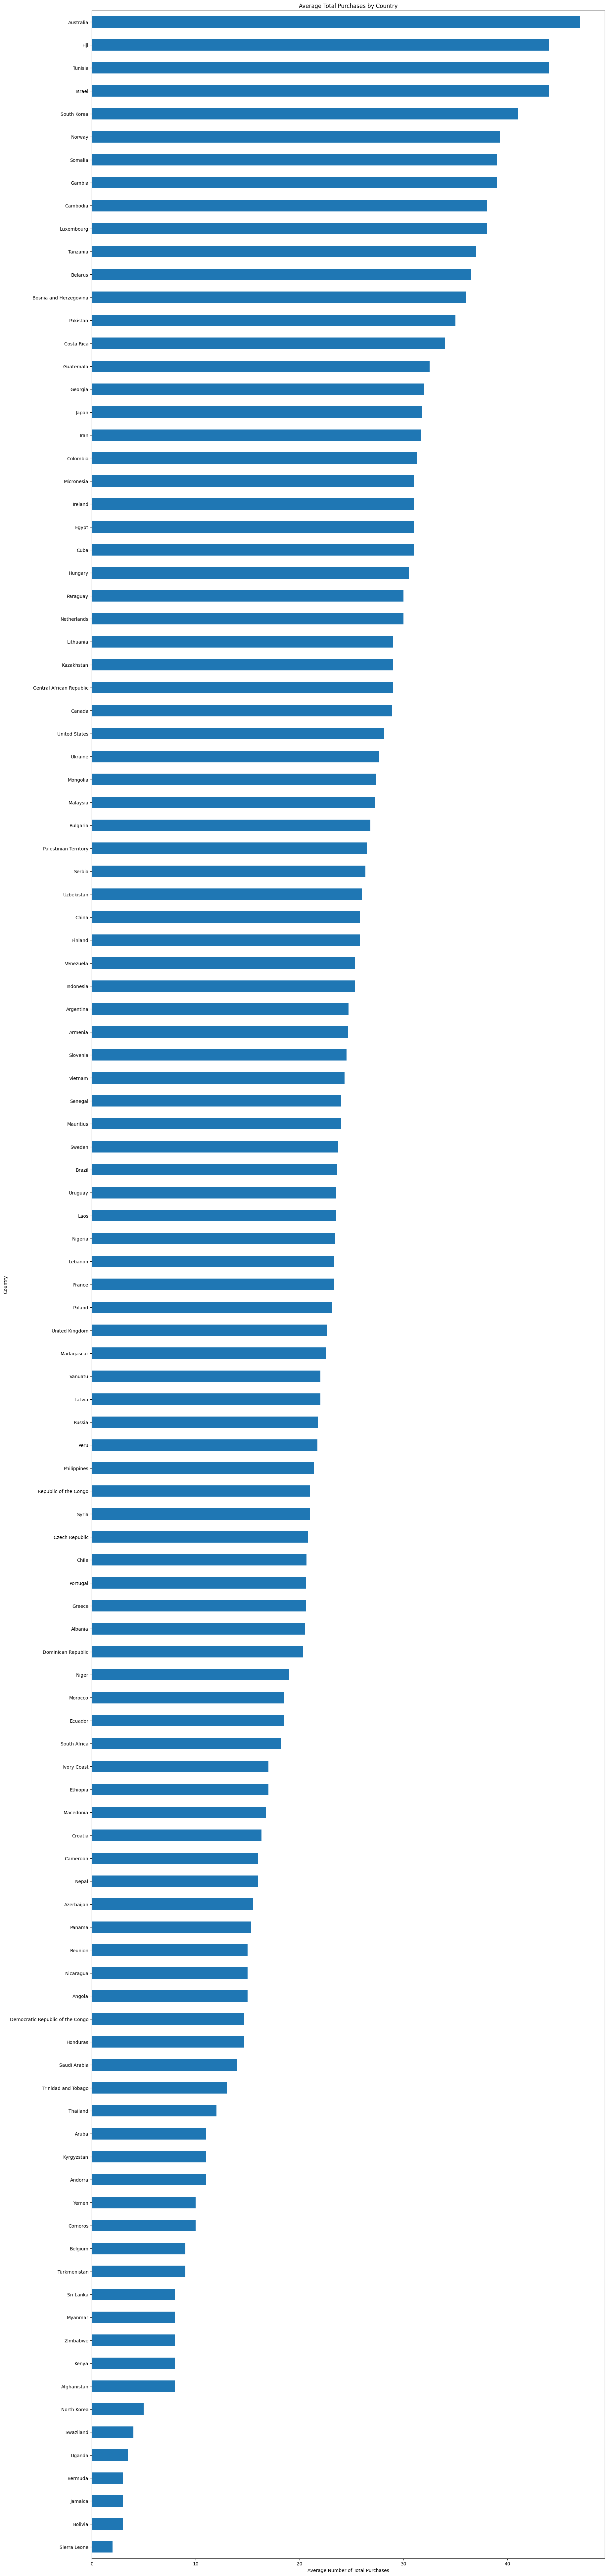

In [6]:
aggregate_df["Avg_Total_Purchases"].sort_values().plot(kind="barh", figsize=(20,100))

plt.xlabel("Average Number of Total Purchases")
plt.ylabel("Country")
plt.title("Average Total Purchases by Country")
plt.show()

In [7]:
aggregate_df["Max_Total_Purchases"].sort_values()

,Max_Total_Purchases
Country,
Sierra Leone,2
Bolivia,3
Jamaica,3
Bermuda,3
Swaziland,4
...,...
China,48
Indonesia,48
Russia,48


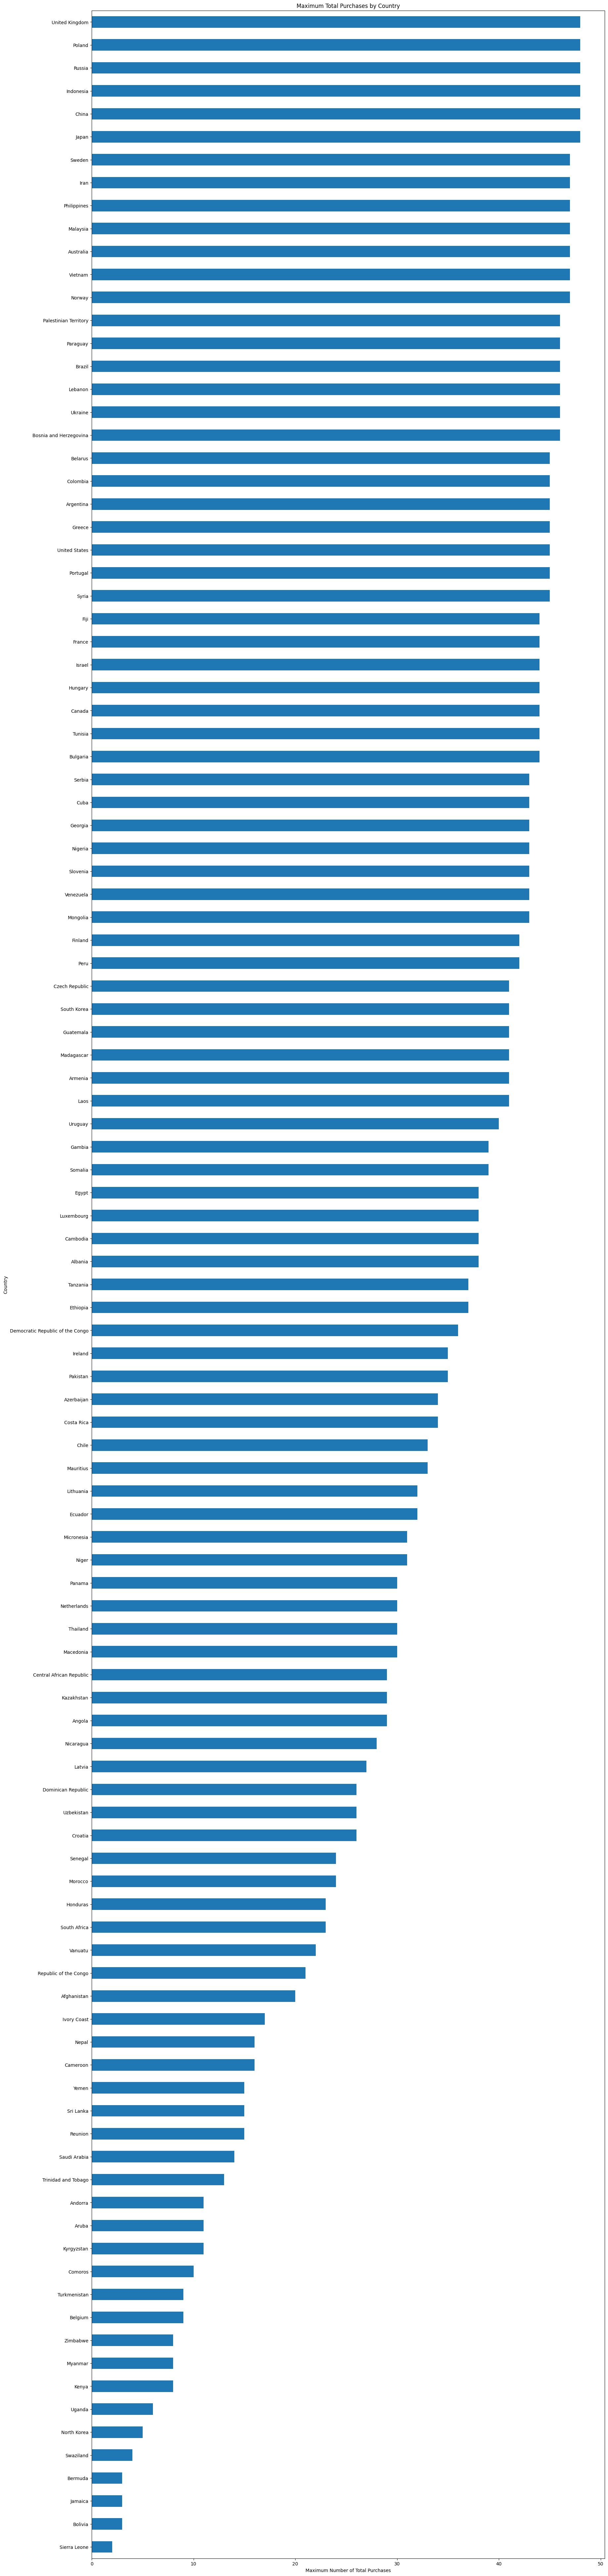

In [8]:
aggregate_df["Max_Total_Purchases"].sort_values().plot(kind="barh", figsize=(20,100))

plt.xlabel("Maximum Number of Total Purchases")
plt.ylabel("Country")
plt.title("Maximum Total Purchases by Country")
plt.show()

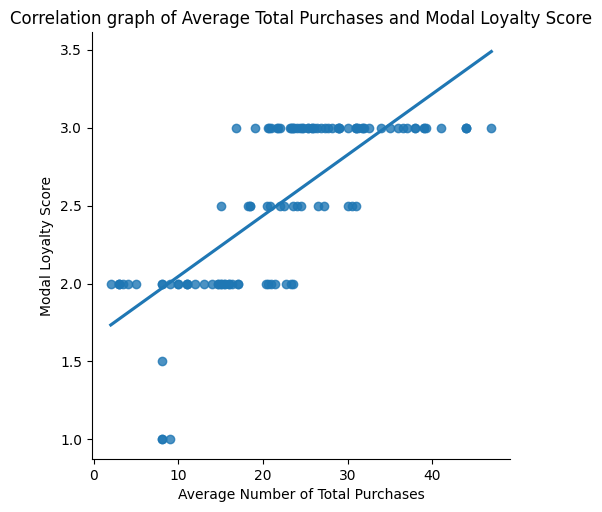

In [9]:
sns.lmplot(x="Avg_Total_Purchases",y="Mode_Loyalty_Score",data=aggregate_df,ci=None)

plt.xlabel("Average Number of Total Purchases")
plt.ylabel("Modal Loyalty Score")
plt.title("Correlation graph of Average Total Purchases and Modal Loyalty Score")
plt.show()

In [10]:
df_no_mx.groupby("Country").agg(No_of_Purchases =("Total Purchases","count")).sort_values("No_of_Purchases")

,No_of_Purchases
Country,
Andorra,1
Australia,1
Aruba,1
Bermuda,1
Belgium,1
...,...
Brazil,37
Philippines,38
Russia,55


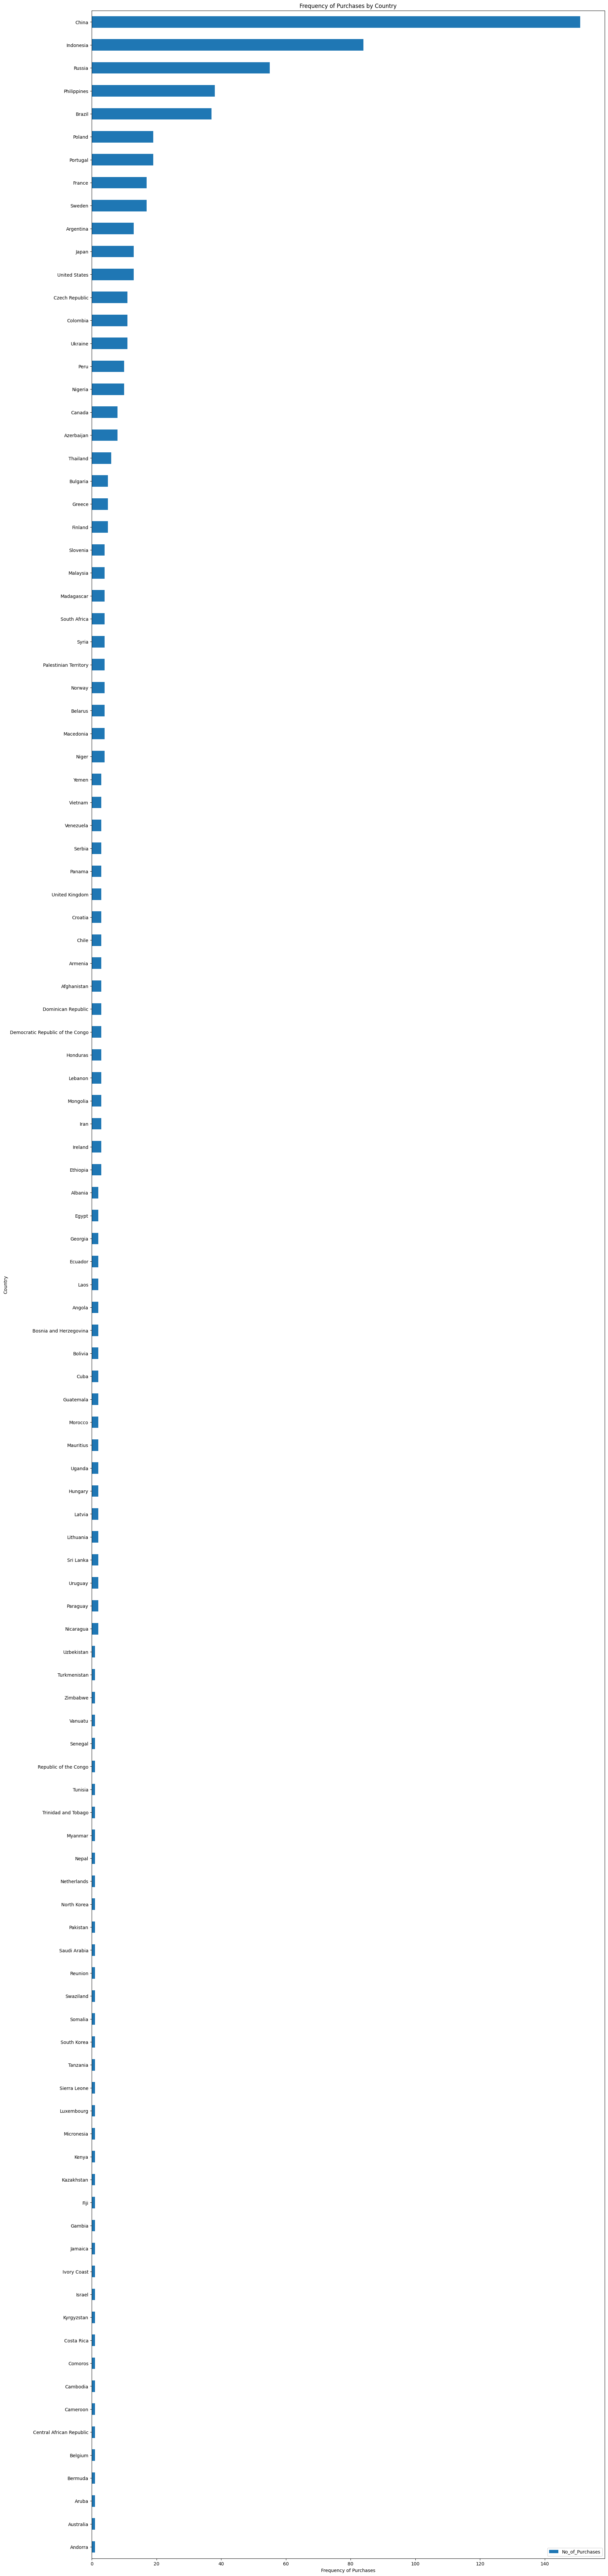

In [11]:
df_no_mx.groupby("Country").agg(No_of_Purchases =("Total Purchases","count")).sort_values("No_of_Purchases").plot(kind="barh", figsize=(20,100))

plt.xlabel("Frequency of Purchases")
plt.ylabel("Country")
plt.title("Frequency of Purchases by Country")
plt.show()

# Findings

1. Summary Statistics of the following
  1. Total Purchases
    - Mean : 23.89
    - Median : 24.00
    - Standard deviation : 13.90
  2. Loyalty Score
    - Mean : 2.49
    - Median : 3.00
    - Standard deviation : 0.63
2. The earliest customer sign-up was on 18th March, 2015 and the latest was on 29th February, 2024
3. Australia has the highest Average Total Purchases (47 per customer) while Sierra Leone has the lowest (2 per customer). The distribution of other countries in in the chart in [Findings.md](https://github.com/Data-Epic/data-wrangling-chidimma-ijoma/blob/feature-task/task%201/Findings.md)
4. Japan, China, Indonesia, Russia, Poland, United Kingdom have the highest maximum Total Purchases (48 per customer) while Sierra Leone has the lowest (2 per customer). The distribution of other countries in in the chart in [Findings.md](https://github.com/Data-Epic/data-wrangling-chidimma-ijoma/blob/feature-task/task%201/Findings.md)
5. There is a positive correlation between the Average Total Purchases and the Loyalty Scores as shown in the chart in [Findings.md](https://github.com/Data-Epic/data-wrangling-chidimma-ijoma/blob/feature-task/task%201/Findings.md)
6. China has the highest number of Purchases (151). The distribution of other countries in in the chart in [Findings.md](https://github.com/Data-Epic/data-wrangling-chidimma-ijoma/blob/feature-task/task%201/Findings.md)